In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable 

In [2]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [3]:
#import os


In [4]:
# os.getcwd()

In [5]:
df = pd.read_csv("../data/7.dataframe_limpio.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q25_salario_new
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,Vim / Emacs,A laptop,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...",50-59,Man,India,Bachelor’s degree,Other,27499.5
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Python,"Notepad++,Jupyter Notebook","A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)",50-59,Man,Other,Master’s degree,Program/Project Manager,64999.5


# 2. La industria y la presencia de trabajadores vinculados a la ciencia de datos y el aprendizaje automático

Ordenación del as categorias sin unknow y en orden ascendente

In [6]:
df_i = df[(df['q20_i_actual'] != 'Unknown') & (df['q20_i_actual'] != 'Other') ]
df_i_ordenado = df_i.sort_values('q20_i_actual', ascending = False)

In [7]:
df_c = df_i_ordenado[(df_i['q21_tamanio_cia'] != 'Unknown')]
df_c_ordenado = df_c.sort_values('q21_tamanio_cia', ascending = False)

/tmp/ipykernel_10623/1155751159.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_c = df_i_ordenado[(df_i['q21_tamanio_cia'] != 'Unknown')]


In [8]:
df_da = df_c_ordenado[(df['q22_da_cia'] != 'Unknown') & (df_c_ordenado['q22_da_cia'] != '0') ]
df_da_ordenado = df_da.sort_values('q22_da_cia', ascending = False)

/tmp/ipykernel_10623/3810622462.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_da = df_c_ordenado[(df['q22_da_cia'] != 'Unknown') & (df_c_ordenado['q22_da_cia'] != '0') ]


In [9]:
def graficar_countplot (df,lista):

    df_lista = df[lista]
    fig, axes = plt.subplots(1, len(lista), figsize=(25,6))

    for ax in fig.axes:
        ax.tick_params(labelrotation=90)
    for i in range(len(df_lista.columns)):
        sns.set_style('whitegrid')# grid
        sns.countplot(x = df_lista.columns[i], 
                        data = df, 
                        ax=axes[i],
                        palette = 'Set2')
    
    axes[0].set_title("Tipo de industria")
    axes[0].set_xlabel("Industria actual")
    
    axes[1].set_title("Tamaño de la industria")
    axes[1].set_xlabel("Tamaño de la industria")
    
    axes[2].set_title("Número de data empleados")
    axes[2].set_xlabel("Número de empleados")
    
    return plt.show();

In [10]:
lista_graficar = ['q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia']

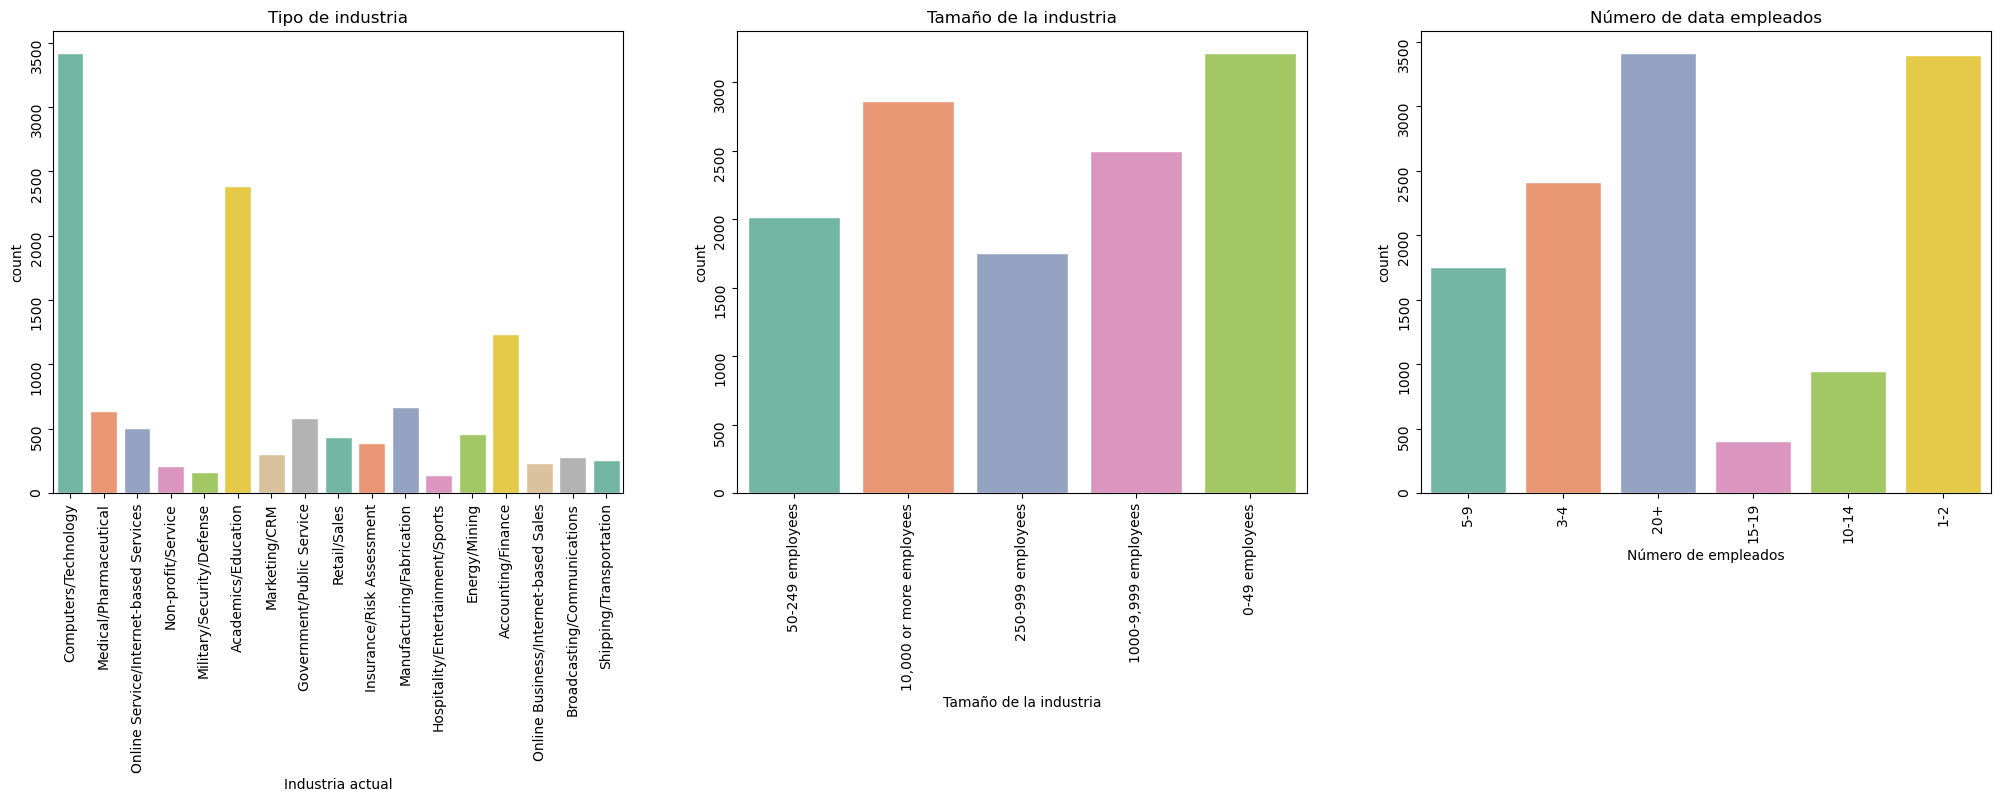

In [11]:
graficar_countplot(df_da_ordenado,lista_graficar)

Text(0, 0.5, 'Industria actual')

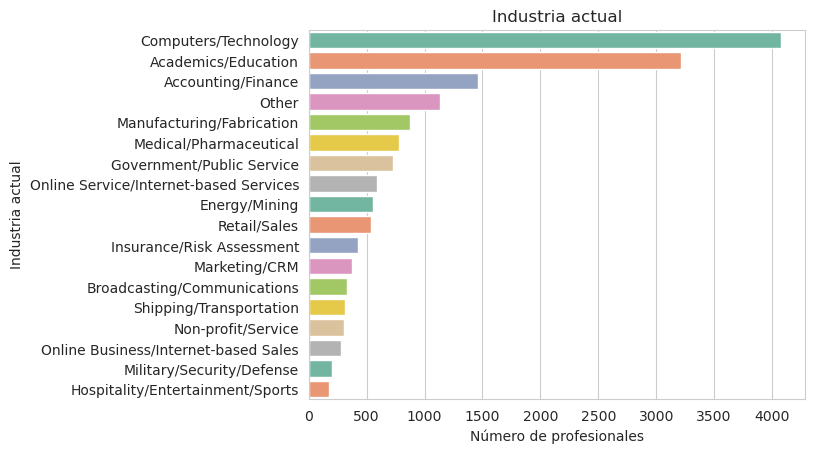

In [12]:
sns.set_style('whitegrid')# grid
sns.countplot(data=df , y= 'q20_i_actual',
            palette = 'Set2',
            order= ['Computers/Technology', 'Academics/Education',
                    'Accounting/Finance', 'Other', 'Manufacturing/Fabrication',
                    'Medical/Pharmaceutical', 'Government/Public Service',
                    'Online Service/Internet-based Services', 'Energy/Mining',
                    'Retail/Sales', 'Insurance/Risk Assessment', 'Marketing/CRM',
                    'Broadcasting/Communications', 'Shipping/Transportation',
                    'Non-profit/Service', 'Online Business/Internet-based Sales',
                    'Military/Security/Defense', 'Hospitality/Entertainment/Sports'])
plt.title("Industria actual")
plt.xlabel("Número de profesionales")
plt.ylabel("Industria actual")

In [13]:
df_analistas = df[df["q5_ocupacion"]== "Data Analyst"]

In [14]:
df_analistas.groupby('q20_i_actual').count().reset_index()

,q20_i_actual,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q25_salario_new
0,Academics/Education,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337,337
1,Accounting/Finance,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273
2,Broadcasting/Communications,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
3,Computers/Technology,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
4,Energy/Mining,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
5,Government/Public Service,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
6,Hospitality/Entertainment/Sports,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
7,Insurance/Risk Assessment,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
8,Manufacturing/Fabrication,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
9,Marketing/CRM,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87


## ¿En qué industria existe mayor número de analistas de datos?

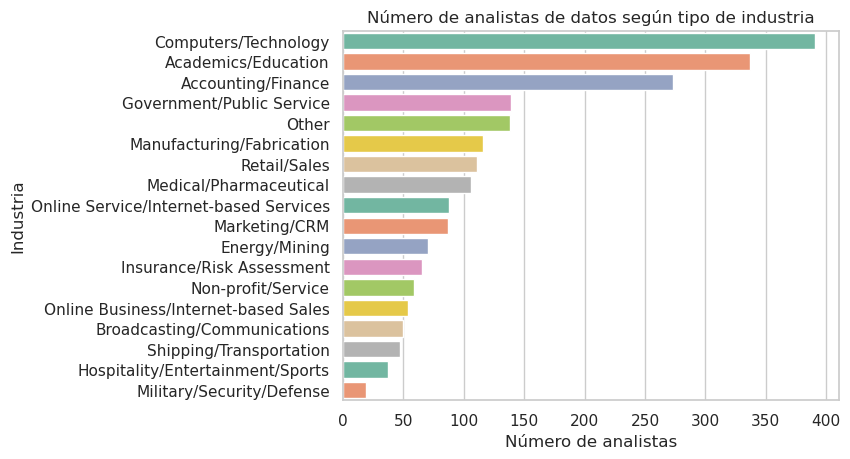

In [15]:
sns.set_theme(style="whitegrid")# grid
g = sns.countplot(data=df_analistas , y= 'q20_i_actual',
            palette = 'Set2',
            order= ['Computers/Technology', 'Academics/Education', 'Accounting/Finance',
                'Government/Public Service', 'Other', 'Manufacturing/Fabrication', 'Retail/Sales', 'Medical/Pharmaceutical',
                'Online Service/Internet-based Services', 'Marketing/CRM',
                'Energy/Mining', 'Insurance/Risk Assessment', 'Non-profit/Service',
                'Online Business/Internet-based Sales', 'Broadcasting/Communications',
                'Shipping/Transportation', 'Hospitality/Entertainment/Sports',
                'Military/Security/Defense'])
                    
plt.title('Número de analistas de datos según tipo de industria')
plt.xlabel('Número de analistas') # definir el nombre del eje X
plt.ylabel('Industria') # definir el nombre del eje Y
plt.savefig("graficas/20-2-Número de analistas por industria.png")

# ¿Qué industria paga mejor a los Data Anlalyst?

In [16]:
df_industria = df_analistas.groupby('q20_i_actual').mean()
df_industria.reset_index(inplace=True)
df_industria.head()

,q20_i_actual,q25_salario_new
0,Academics/Education,37493.070139
1,Accounting/Finance,38757.529767
2,Broadcasting/Communications,35007.220328
3,Computers/Technology,34521.451757
4,Energy/Mining,34385.600384


In [17]:
df_industria_ordenado = df_industria.sort_values('q25_salario_new', ascending = False)

In [18]:
df_industria_ordenado.value_counts()

q20_i_actual                            q25_salario_new
Academics/Education                     37493.070139       1
Medical/Pharmaceutical                  37699.245581       1
Shipping/Transportation                 55057.691863       1
Retail/Sales                            41529.356235       1
Other                                   34676.333732       1
Online Service/Internet-based Services  31682.216188       1
Online Business/Internet-based Sales    30950.129976       1
Non-profit/Service                      33023.788473       1
Military/Security/Defense               37083.395106       1
Marketing/CRM                           41831.948639       1
Accounting/Finance                      38757.529767       1
Manufacturing/Fabrication               52540.151215       1
Insurance/Risk Assessment               48875.315781       1
Hospitality/Entertainment/Sports        30615.230299       1
Government/Public Service               40462.493176       1
Energy/Mining                

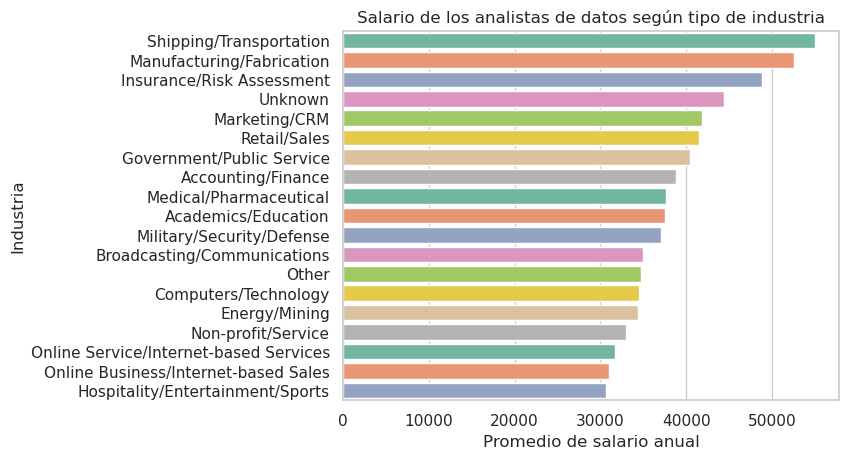

In [19]:
sns.barplot(y='q20_i_actual', 
            x = 'q25_salario_new',
             data= df_industria_ordenado, 
             palette = 'Set2')
plt.title('Salario de los analistas de datos según tipo de industria')
plt.xlabel('Promedio de salario anual') # definir el nombre del eje X
plt.ylabel('Industria') # definir el nombre del eje Y
# plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/20-2-Salario analistas por industria.png");

# Para ver las industrias, en España, que mejor pagan:

In [20]:
df_españa_ind = df_analistas[df_analistas['q3_pais'] == 'Spain']

In [21]:
df_industria2 = df_españa_ind.groupby('q20_i_actual').mean()
df_industria2.reset_index(inplace=True)
df_industria2.head(20)

,q20_i_actual,q25_salario_new
0,Academics/Education,24271.500260
1,Accounting/Finance,41666.166667
2,Computers/Technology,28299.000585
3,Energy/Mining,44549.000585
4,Government/Public Service,69999.500000
5,Medical/Pharmaceutical,26874.500000
6,Online Service/Internet-based Services,64999.500000
7,Other,11499.500000
8,Retail/Sales,48865.833723
9,Shipping/Transportation,174999.500000


In [22]:
df_industria_ordenado_esp = df_industria2.sort_values('q25_salario_new', ascending = False)

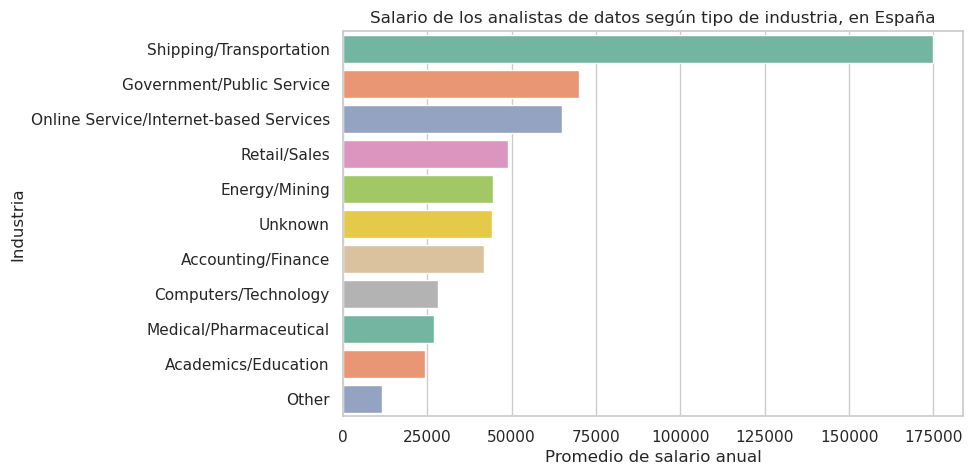

In [23]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.barplot(y='q20_i_actual', x = 'q25_salario_new', data= df_industria_ordenado_esp , palette = 'Set2')
plt.title('Salario de los analistas de datos según tipo de industria, en España')
plt.xlabel('Promedio de salario anual') # definir el nombre del eje X
plt.ylabel('Industria') # definir el nombre del eje Y
# plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/20-3-Salario analistas por industria.png");

## ¿Y como está colocado el analista de datos respecto a otros puestos en cuánto a salario?

In [24]:
df_salario_ocupacion = df.groupby('q5_ocupacion').mean()
df_salario_ocupacion.reset_index(inplace=True)
df_salario_ocupacion['q5_ocupacion'].unique()

array(['Business Analyst', 'Currently not employed',
       'DBA/Database Engineer', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Developer Relations/Advocacy',
       'Machine Learning Engineer', 'Other', 'Product Manager',
       'Program/Project Manager', 'Research Scientist',
       'Software Engineer', 'Statistician', 'Student'], dtype=object)

In [25]:
df_salario_ocupacion = df_salario_ocupacion[(df_salario_ocupacion['q5_ocupacion'] != 'Student') & (df_salario_ocupacion['q5_ocupacion'] != 'Currently not employed') ]
df_ocu_ordenado = df_salario_ocupacion.sort_values('q25_salario_new', ascending = False)

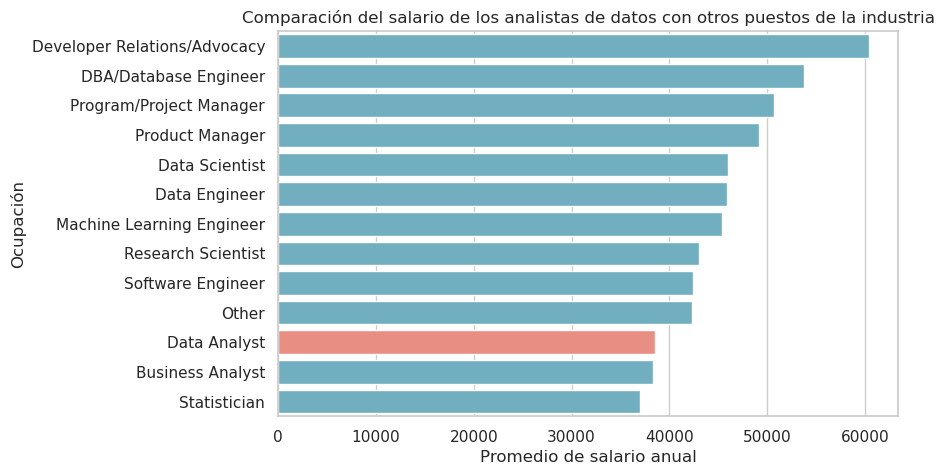

In [29]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.barplot(y='q5_ocupacion', x = 'q25_salario_new', data= df_ocu_ordenado , palette = ["c" if x != 'Data Analyst' else '#FA8072' for x in df_ocu_ordenado['q5_ocupacion']])
plt.title('Comparación del salario de los analistas de datos con otros puestos de la industria')
plt.xlabel('Promedio de salario anual') # definir el nombre del eje X
plt.ylabel('Ocupación') # definir el nombre del eje Y
# plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/20-4-Puestos analistas por industria.png", bbox_inches='tight');

In [75]:
df_an_genero_sal = df_analistas.groupby('q2_genero_new').mean().reset_index()
df_gen_ordenado = df_an_genero_sal.sort_values('q25_salario_new', ascending = False).reset_index()

/tmp/ipykernel_293/2701424607.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_an_genero_sal = df_analistas.groupby('q2_genero_new').mean().reset_index()


## ¿Y la brecha de género en el salario?

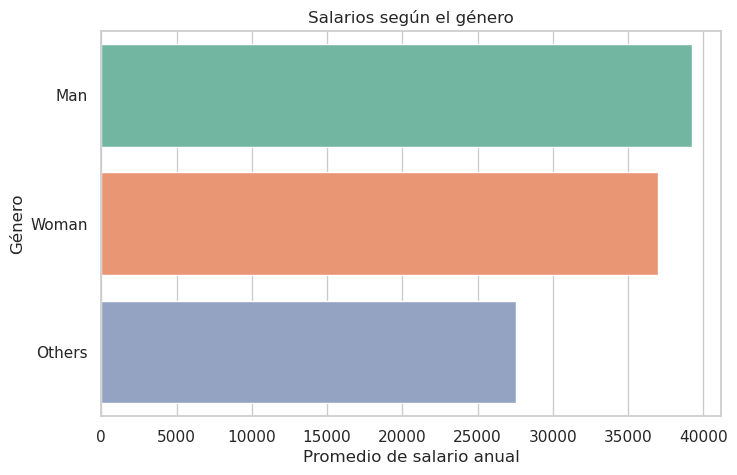

In [76]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.barplot(y='q2_genero_new', x = 'q25_salario_new', data= df_gen_ordenado , palette = 'Set2')
plt.title('Salarios según el género')
plt.xlabel('Promedio de salario anual') # definir el nombre del eje X
plt.ylabel('Género') # definir el nombre del eje Y
# plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/20-5-Puestos analistas por industria.png");

plt.show()

In [77]:
for i, column in enumerate(df["q25_salario_new"]):
    sns.boxplot(x=df[column], data=df, ax=ax[i])
    plt.show()

KeyError: 27499.5

<AxesSubplot:xlabel='q2_genero_new', ylabel='q25_salario_new'>

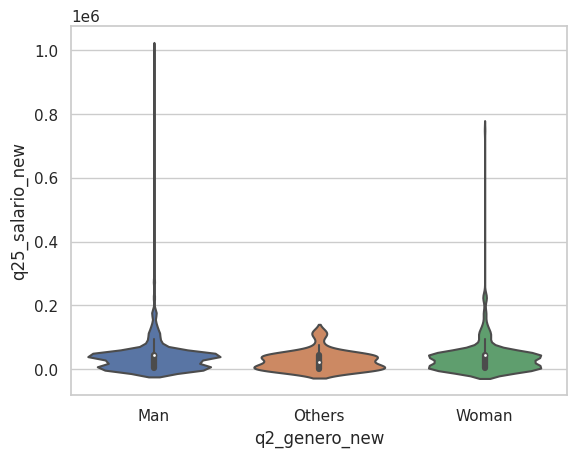

In [ ]:
sns.violinplot ( x="q2_genero_new" , y= "q25_salario_new", data= df_analistas, hist=True, kde=False, rug=False)

# ¿Cuántos analistas de datos en relación al tamaño de la empresa?

Text(0.5, 0, 'Número de analistas')

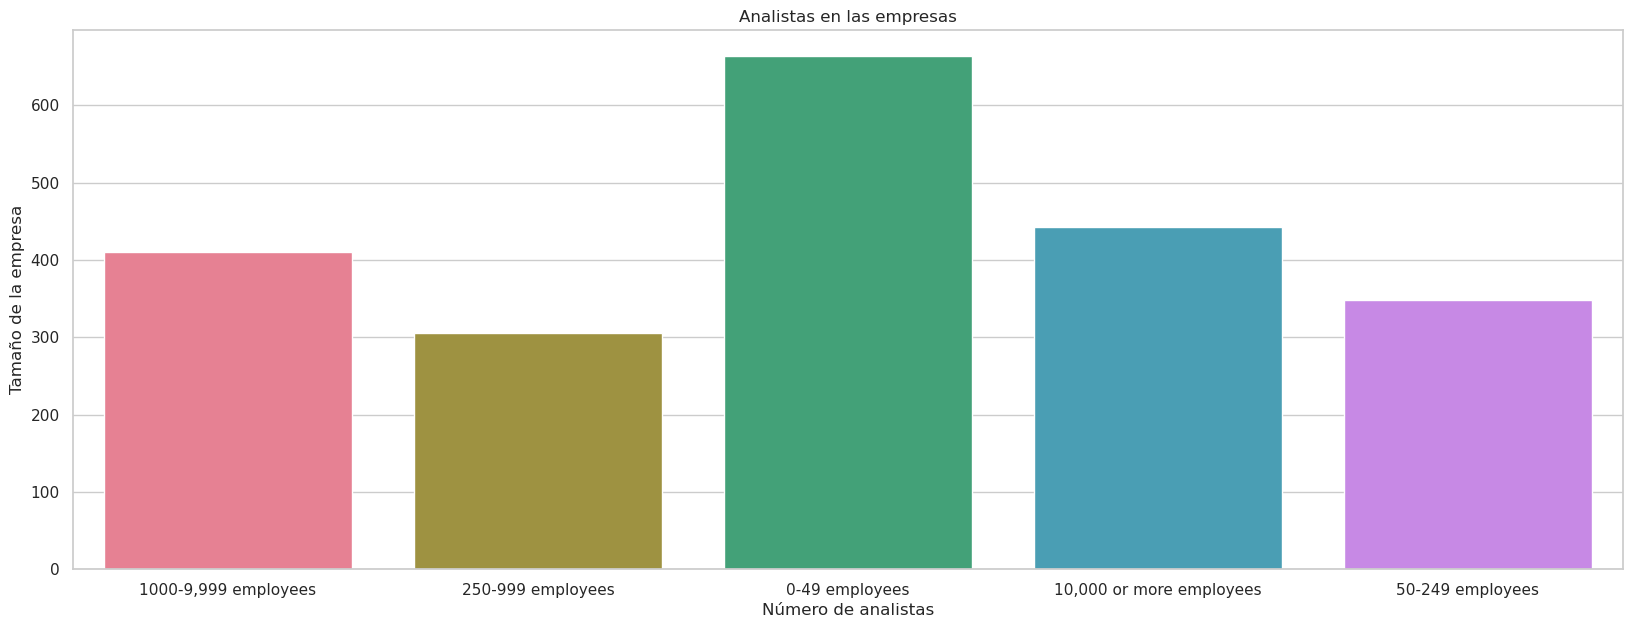

In [ ]:
plt.figure(figsize= (20,7))
sns.set_theme(style="whitegrid")# grid
sns.countplot(x = 'q21_tamanio_cia', 
            data=df_analistas, 
            palette = 'husl',
            order=['1000-9,999 employees','250-999 employees','0-49 employees','10,000 or more employees','50-249 employees'])
plt.title("Analistas en las empresas")
plt.ylabel("Tamaño de la empresa")
plt.xlabel("Número de analistas")
# plt.legend((['Man','Woman','Others']))

# ¿Cuántos analistas de datos en relación al tamaño de la empresa, es una condición el género?

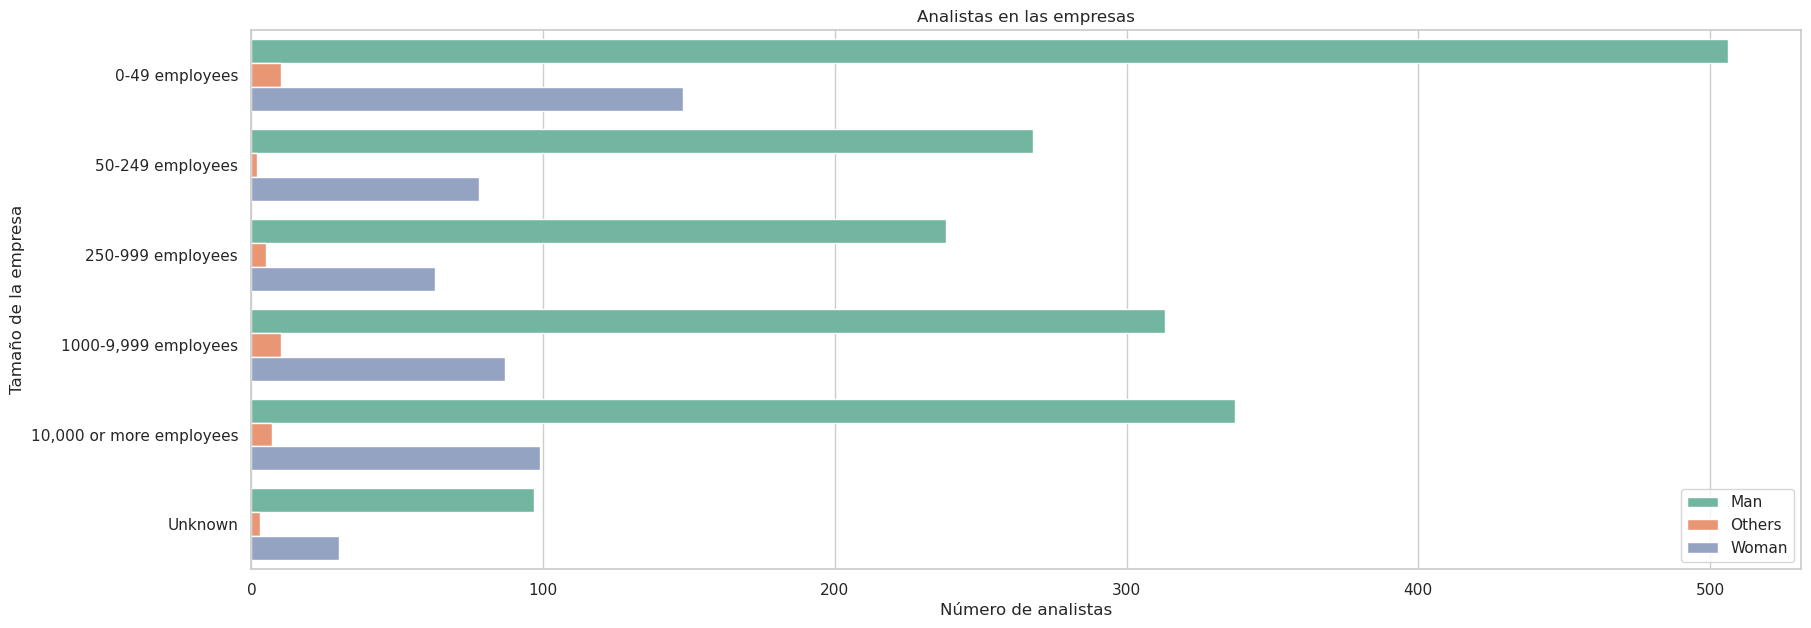

In [ ]:
plt.figure(figsize= (20,7))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y = 'q21_tamanio_cia', 
data=df_analistas, 
hue = 'q2_genero_new', 
palette = 'Set2',
order=['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees','Unknown'])
plt.title("Analistas en las empresas")
plt.ylabel("Tamaño de la empresa")
plt.xlabel("Número de analistas")
plt.legend((['Man','Others','Woman']))

In [ ]:
def graficar_countplot (df,lista):
    df_lista = df[lista]
    fig, axes = plt.subplots(1, len(lista), figsize=(25,6))
    for ax in fig.axes:
        ax.tick_params(labelrotation=90)
    for i in range(len(df_lista.columns)):
        sns.countplot(x = df_lista.columns[i], data = df, ax=axes[i], hue="q2_genero_new");
    return plt.show();

In [ ]:
columnas_graficos1=['q20_i_actual','q25_salario_new']

In [ ]:
columnas_g2 = ['q21_tamanio_cia','q2_genero_new']

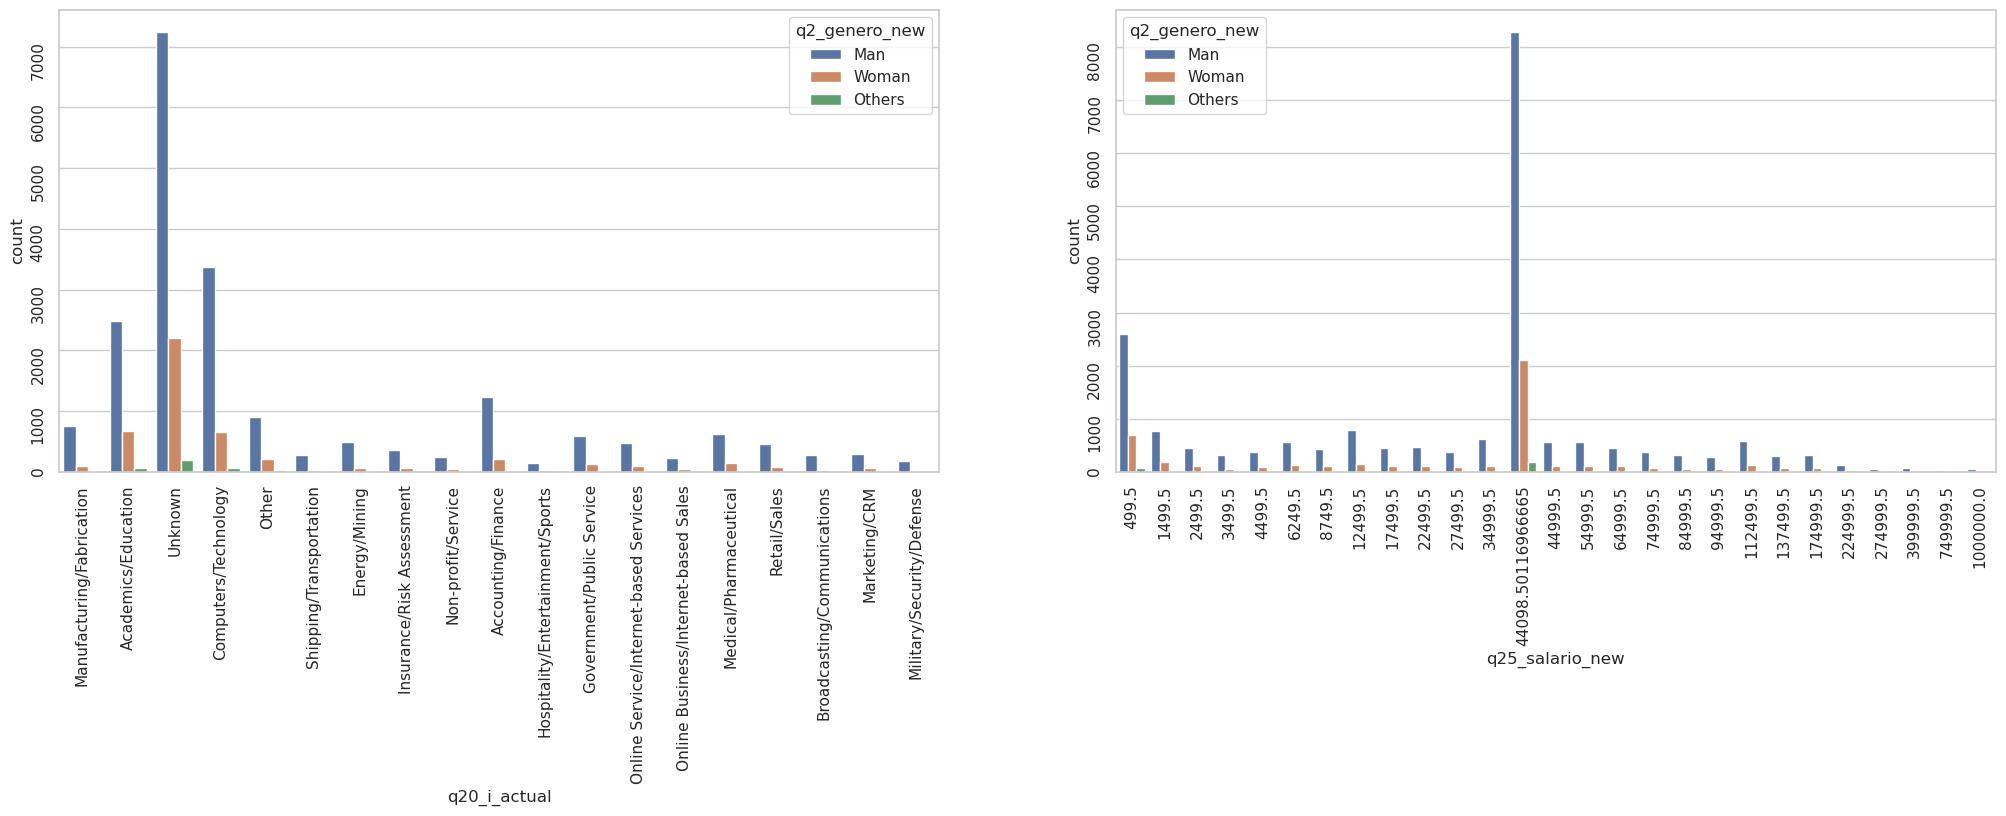

In [ ]:
graficar_countplot(df,columnas_graficos1)

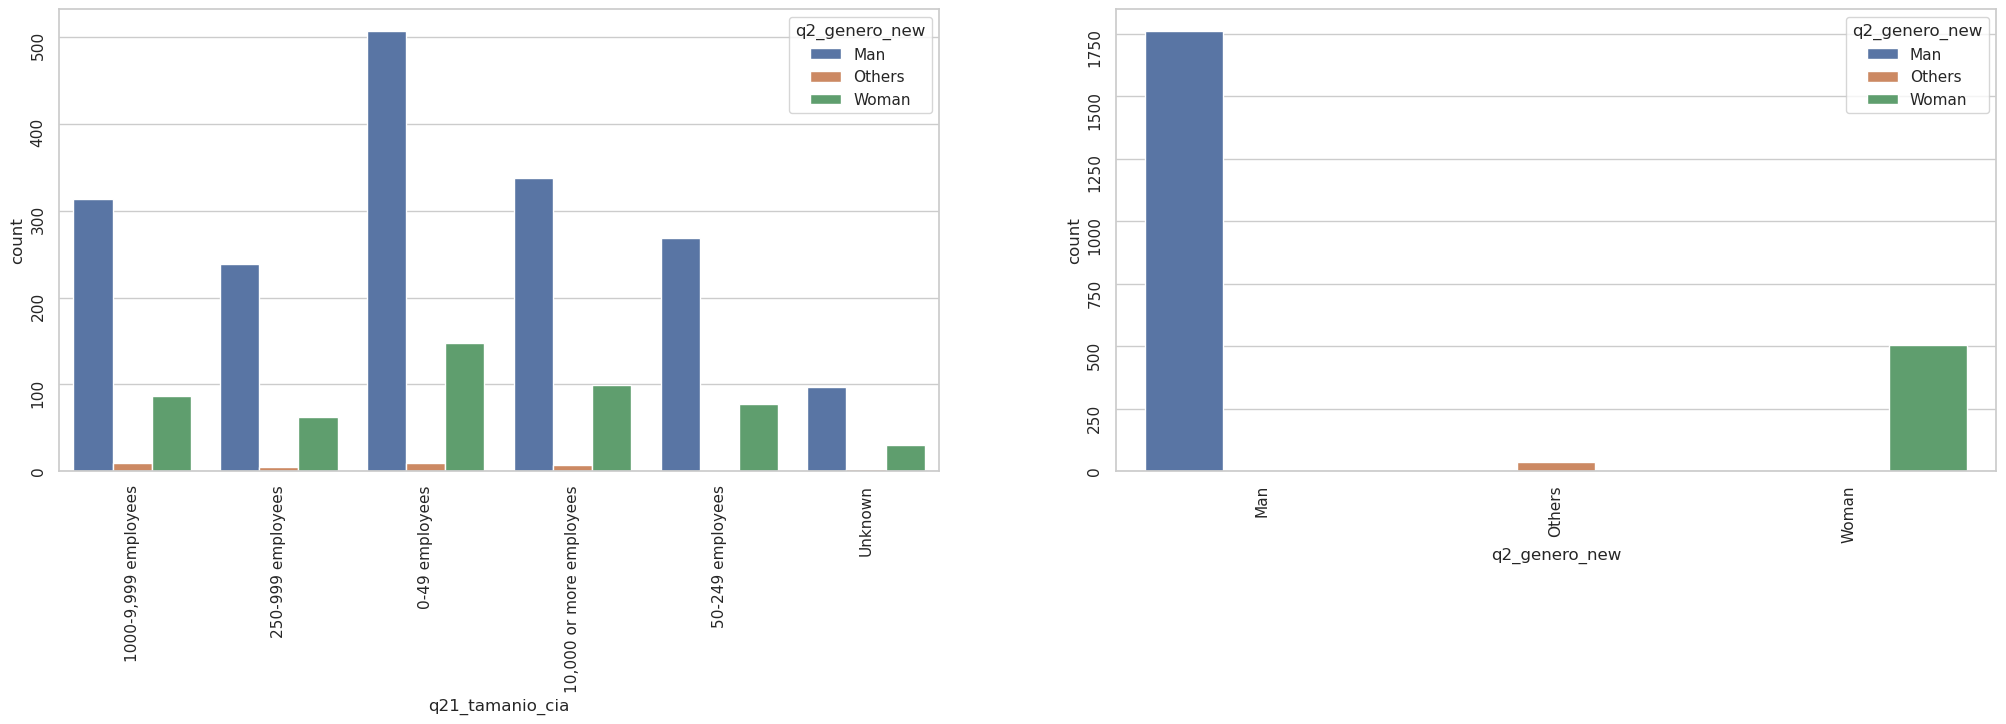

In [ ]:
graficar_countplot(df_analistas,columnas_g2)

A modo de resumen podemos ver los hombres dominan el mundo del data, y que en la mayoria de las empresas el equipo de analistas en la mayoria de las empreas es pequeño y suele estar dominado por hombres.